In [1]:
import yfinance as yf 
import pandas as pd
from matplotlib import pylab as plt
import numpy as np
from datetime import datetime
import pandas_datareader.data as web

from time import sleep

import quandl

import seaborn as sns

import sys

from scipy.stats import norm
from statsmodels.distributions.empirical_distribution import ECDF


# Macro Analysis

To Do
- Economic Quadrant
- Econmic Quadrant with Rate of Change
- M2 growth
- M2 Acceleration
- 10Y bond yield rate of change
- Include Qualtiles of all
- Present in a nice format
- economic policy
-  Sentiment (TED spread, )

In [2]:
GDP_tmp = web.DataReader('GDPC1','fred', '1970-01-01') #Quaterly
CPI_tmp = web.DataReader('CPIAUCSL','fred', '1970-01-01') # Monthly
yield10_tmp = web.DataReader('DGS10','fred', '1970-01-01') # Daily
M2_tmp = web.DataReader('M2','fred', '1970-01-01') # Weekly

### Growth YoY

In [3]:
GDP_Change = GDP_tmp.pct_change(4) 
CPI_Change = CPI_tmp.pct_change(12)

In [4]:
Growth_Data = pd.concat([GDP_Change, CPI_Change],axis =1)
Growth_Data.columns = ["GDP", "CPI"]
Growth_Data = Growth_Data.dropna()

Growth_Data.index = Growth_Data.index.to_period('Q')

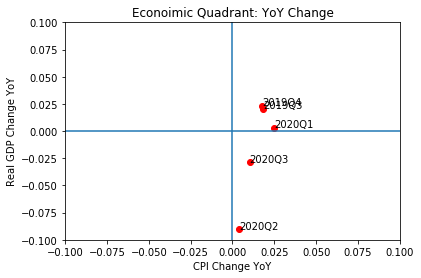

In [5]:
n=5
plt.scatter(Growth_Data["CPI"].tail(n), Growth_Data["GDP"].tail(n), color = "red")

plt.ylabel("Real GDP Change YoY")
plt.xlabel("CPI Change YoY")

plt.axhline(y=0)
plt.axvline()

plt.xlim(-0.1, 0.1)
plt.ylim(-0.1, 0.1)

for i, txt in enumerate(Growth_Data["CPI"].tail(n).index):
    plt.annotate(txt, (Growth_Data["CPI"].tail(n)[i], Growth_Data["GDP"].tail(n)[i]))
    
plt.title('Econoimic Quadrant: YoY Change');

### Rate of Change YoY

In [9]:
GDP_RC = GDP_tmp.pct_change(4).pct_change(4) 
CPI_RC = CPI_tmp.pct_change(12).pct_change(12)


RC_Data = pd.concat([GDP_RC, CPI_RC],axis =1)
RC_Data.columns = ["GDP", "CPI"]
RC_Data = RC_Data.dropna()

RC_Data.index = RC_Data.index.to_period('Q')

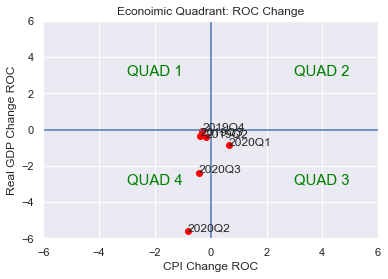

In [13]:
n=6
lim = 6
sns.set()
plt.scatter(RC_Data["CPI"].tail(n), RC_Data["GDP"].tail(n), color = "red")

plt.ylabel("Real GDP Change ROC")
plt.xlabel("CPI Change ROC")

plt.axhline(y=0)
plt.axvline()

plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

for i, txt in enumerate(RC_Data["CPI"].tail(n).index):
    plt.annotate(txt, (RC_Data["CPI"].tail(n)[i], RC_Data["GDP"].tail(n)[i]))

plt.text(-lim/2, lim/2, r'QUAD 1', fontsize=15, color='green')
plt.text(lim/2, lim/2, r'QUAD 2', fontsize=15, color='green')
plt.text(lim/2, -lim/2, r'QUAD 3', fontsize=15, color='green')
plt.text(-lim/2, -lim/2, r'QUAD 4', fontsize=15, color='green')
    
plt.title('Econoimic Quadrant: ROC Change');

### Data and Stats for 10 Y bond and M2

In [8]:
yield10_Change = yield10_tmp.pct_change(252)
M2_Change = M2_tmp.pct_change(52)

M2_RC = M2_Change.pct_change(52)

In [9]:
yield10_Change.tail(1)
M2_Change.tail(1)
M2_RC.tail(1)

,M2
DATE,
2020-11-30,2.551366


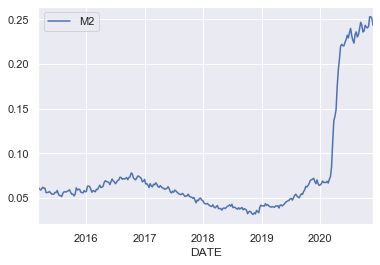

In [10]:
M2_Change.tail(300).plot()

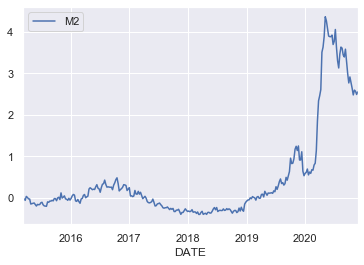

In [11]:
M2_RC.tail(300).plot()

In [14]:
RC_Data.tail(10)

,GDP,CPI
DATE,,
2018Q2,0.522618,0.105257
2018Q3,0.314170,0.667186
2018Q4,-0.084273,0.234108
2019Q1,-0.263663,-0.282707
2019Q2,-0.409608,-0.174719
2019Q3,-0.333671,-0.374616
2019Q4,-0.055194,-0.300358
2020Q1,-0.859096,0.654338
2020Q2,-5.601133,-0.811423


In [32]:
Growth_Data.tail(10)*100

,GDP,CPI
DATE,,
2018Q2,3.325187,2.417048
2018Q3,3.116300,2.928031
2018Q4,2.475518,2.517338
2019Q1,2.265802,1.500707
2019Q2,1.963163,1.994743
2019Q3,2.076481,1.831145
2019Q4,2.338885,1.761236
2020Q1,0.319261,2.482677
2020Q2,-9.032775,0.376163


In [29]:
Growth_Data.tail(10).diff(1)

,GDP,CPI
DATE,,
2018Q2,NaN,NaN
2018Q3,-0.002089,0.005110
2018Q4,-0.006408,-0.004107
2019Q1,-0.002097,-0.010166
2019Q2,-0.003026,0.004940
2019Q3,0.001133,-0.001636
2019Q4,0.002624,-0.000699
2020Q1,-0.020196,0.007214
2020Q2,-0.093520,-0.021065
